# Introduction

O dataset foi obtido no [Kaagle](https://www.kaggle.com/jmessiasalves/ufpi-ncad-iot-attacks) e é sobre ataques em redes IoT. 

## Interested issues to explore within this dataset

 - Analisar como os ataques funcionam.
 - Entender o comportamento.
 - Prever ataques.
 - Analisar possíveis correlações não exploradas.
 
### Team
 - Igor Melo
 - Jarélio Filho
 - Leyberson Assunção
 - Gustavo Mota
 - Eduardo Linhares
 
### Index
 - 1 -  Meeting the data.
 - 1.1 -  Reading the data.
 - 1.2 - Initial data analysis.
 - 1.3 - Solving "Shift" Problem.
 - 2 - Back to Data Analysis
 - 2.1 - Matrix of Correlations
 - 2.2 - Values and NaN proportion

# 1 - Meeting the Data
# 1.1 - Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import os

%matplotlib inline

In [16]:
if 'UFPI-NCAD-IoT-Attacks-all-v1.csv' not in os.listdir():
    !unzip 578734_1047033_bundle_archive.zip

Archive:  578734_1047033_bundle_archive.zip
  inflating: UFPI-NCAD-IoT-Attacks-all-v1-Description.txt  
  inflating: UFPI-NCAD-IoT-Attacks-all-v1.csv  


In [31]:
df_description = pd.read_csv('UFPI-NCAD-IoT-Attacks-all-v1-Description.txt', sep='|')
# pd.read_csv('UFPI-NCAD-IoT-Attacks-all-v1.csv', sep=';')

# There is two actual ways to read the dataset
path = 'UFPI-NCAD-IoT-Attacks-all-v1.csv'
df_target = pd.read_csv(path, sep=';', low_memory=False)
#df_target = pd.read_csv(path,sep=';', engine='python')

# 1.2 - Initial Data Analysis
Aqui observamos pela primeira vez os dados e identificamos:

- O que significam os dados armazenados
- Os tipos dos dados
- Volume de dados NaNs
- Problema no dataset

In [3]:
df_description

,FIELD,DESCRIPTION,TYPE
0,frame.time_delta,Time difference compared to the previous capt...,timestamp
1,frame.time_epoch,Full time in the form of timestamp,timestamp
2,frame.time_relative,Time since the first package was sent,timestamp
3,ipv6.plen,IPv6 Payload length,"numerical, 2 bytes"
4,ipv6.nxt,Next Header,"numerical, 1 byte"
5,ipv6.src,Source IPv6 address,nominal-categorical
6,ipv6.dst,Destination IPv6 address,nominal-categorical
7,tcp.srcport,Source Port,"numerical, 2 bytes"
8,tcp.dstport,Destination Port,"numerical, 2 bytes"
9,eth.src,Source MAC address,nominal-categorical


In [4]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015646 entries, 0 to 1015645
Data columns (total 30 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   frame.time_delta     1015646 non-null  object
 1   frame.time_epoch     1015646 non-null  object
 2   frame.time_relative  1015646 non-null  object
 3   ipv6.plen            1015646 non-null  object
 4   ipv6.nxt             1015646 non-null  object
 5   ipv6.src             956463 non-null   object
 6   ipv6.dst             956463 non-null   object
 7   tcp.srcport          1012322 non-null  object
 8   tcp.dstport          1012322 non-null  object
 9   eth.src              1015646 non-null  object
 10  eth.dst              1015646 non-null  object
 11  frame.len            670481 non-null   object
 12  frame.number         810230 non-null   object
 13  mqtt.clientid        142482 non-null   object
 14  mqtt.dupflag         320913 non-null   object
 15  mqtt.hdrflags  

In [5]:
df_target

,frame.time_delta,frame.time_epoch,frame.time_relative,ipv6.plen,ipv6.nxt,ipv6.src,ipv6.dst,tcp.srcport,tcp.dstport,eth.src,...,mqtt.msgtype,mqtt.passwd,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.username,mqtt.willmsg,mqtt.willtopic,label
0,0.000000000,1.573.757.292.769.270.000,0.000000000,68,6,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,50728,1883,60:01:94:0e:87:7a,...,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node07/temperatura,39,NaN,NaN,NaN,normal
1,0.000023000,1.573.757.292.769.290.000,0.000023000,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,1883,50728,68:a3:c4:6e:50:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
2,0.003886000,1.573.757.292.773.170.000,0.003909000,64,6,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,50728,1883,60:01:94:0e:87:7a,...,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node07/umidade,35,NaN,NaN,NaN,normal
3,0.000010000,1.573.757.292.773.180.000,0.003919000,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,1883,50728,68:a3:c4:6e:50:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
4,3.287.798.000,1.573.757.296.060.980.000,3.291.717.000,68,6,fd9e:6c51:2336:0:ce50:e3ff:fe1c:2a5b,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,60066,1883,cc:50:e3:1c:2a:5b,...,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node03/temperatura,39,NaN,NaN,NaN,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015641,0.000010000,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,1883,59172,68:a3:c4:6e:50:12,cc:50:e3:55:cd:91,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN,NaN
1015642,10.003.192.000,68,6,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,59172,1883,cc:50:e3:55:cd:91,68:a3:c4:6e:50:12,122,...,0,1,ufpi/ppgcc/esp-dht22-node01/temperatura,39,NaN,NaN,NaN,normal,NaN,NaN
1015643,0.000023000,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,1883,59172,68:a3:c4:6e:50:12,cc:50:e3:55:cd:91,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN,NaN
1015644,0.013353000,64,6,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,59172,1883,cc:50:e3:55:cd:91,68:a3:c4:6e:50:12,118,...,0,1,ufpi/ppgcc/esp-dht22-node01/umidade,35,NaN,NaN,NaN,normal,NaN,NaN


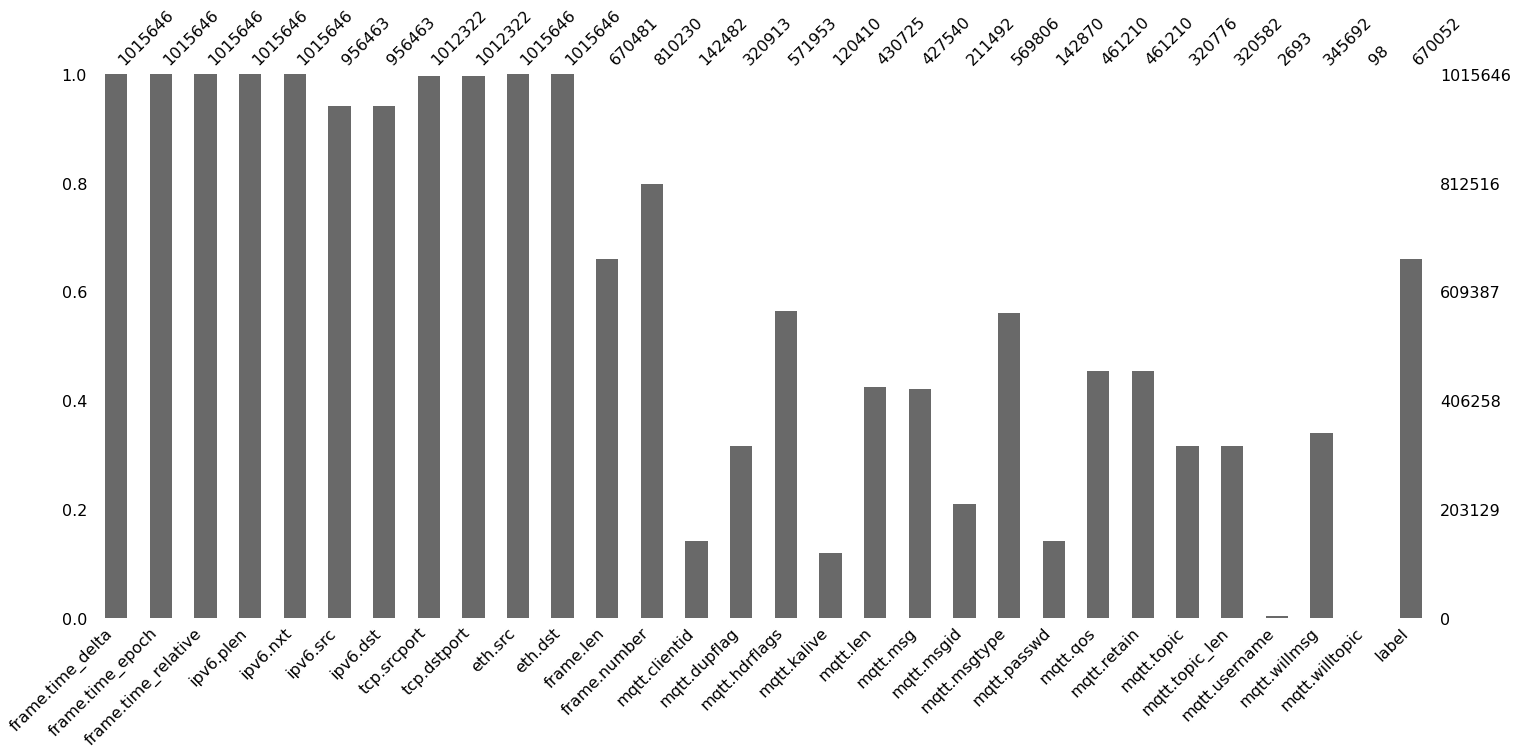

In [8]:
miss = missingno.bar(df_target)

In [11]:
df_target.label.value_counts()

normal        429768
DoS           213956
bruteforce     26328
Name: label, dtype: int64

# 1.3 - Solving "Shift" problem

Identificamos que o problema é que são dois datasets juntos em que o segundo não possui duas das colunas do primeiro. Há um cabeçalho em uma linha específica. Dividimos os dois, concatenamos e refazemos a última análise.

In [42]:
df_target[df_target['frame.time_delta'] == 'frame.time_delta'] # ?

,frame.time_delta,frame.time_epoch,frame.time_relative,ipv6.plen,ipv6.nxt,ipv6.src,ipv6.dst,tcp.srcport,tcp.dstport,eth.src,...,mqtt.msgtype,mqtt.passwd,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.username,mqtt.willmsg,mqtt.willtopic,label
670052,frame.time_delta,ipv6.plen,ipv6.nxt,ipv6.src,ipv6.dst,tcp.srcport,tcp.dstport,eth.src,eth.dst,frame.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.username,mqtt.willmsg,mqtt.willtopic,label,NaN,NaN


In [23]:
df_target[['frame.time_delta', 'frame.time_epoch', 'frame.time_relative']]

,frame.time_delta,frame.time_epoch,frame.time_relative
0,0.000000000,1.573.757.292.769.270.000,0.000000000
1,0.000023000,1.573.757.292.769.290.000,0.000023000
2,0.003886000,1.573.757.292.773.170.000,0.003909000
3,0.000010000,1.573.757.292.773.180.000,0.003919000
4,3.287.798.000,1.573.757.296.060.980.000,3.291.717.000
...,...,...,...
1015641,0.000010000,20,6
1015642,10.003.192.000,68,6
1015643,0.000023000,20,6
1015644,0.013353000,64,6


In [27]:
df_target['ipv6.src'].value_counts()

fd9e:6c51:2336:0:717b:e02b:9c00:d43a    332999
1883                                    143361
fd9e:6c51:2336:0:b043:1759:1f44:81e8    109120
fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91     35589
fd9e:6c51:2336:0:6201:94ff:fe0e:877a     35583
                                         ...  
60369                                        1
49759                                        1
60234                                        1
60365                                        1
60626                                        1
Name: ipv6.src, Length: 295, dtype: int64

In [32]:
df_target.iloc[:670052].to_csv('first_dataset.csv', index = False)
df_target.iloc[670052:].drop(columns=['mqtt.willtopic', 'label'], axis=0).to_csv('second_dataset.csv', header=False, index=False)
del df_target

df = pd.read_csv('first_dataset.csv', low_memory=False)
df_= pd.read_csv('second_dataset.csv', low_memory=False)

df_concat = pd.concat([df, df_])

<AxesSubplot:>

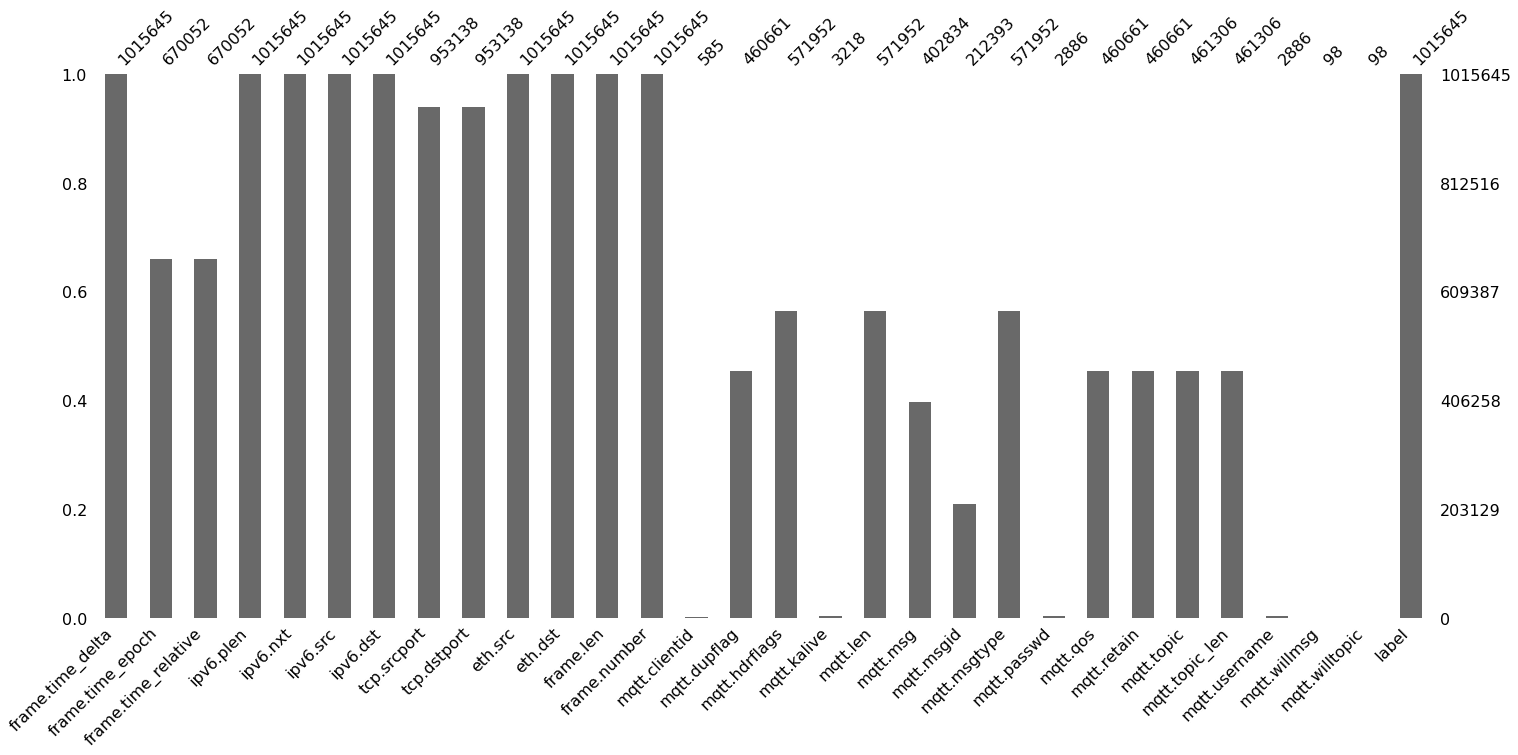

In [33]:
missingno.bar(df_concat)

In [28]:
df_concat["label"].value_counts()

normal         710331
DoS            213956
mitm            56060
bruteforce      26328
enumeration      8970
Name: label, dtype: int64

In [29]:
df_concat

,frame.time_delta,frame.time_epoch,frame.time_relative,ipv6.plen,ipv6.nxt,ipv6.src,ipv6.dst,tcp.srcport,tcp.dstport,eth.src,...,mqtt.msgtype,mqtt.passwd,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.username,mqtt.willmsg,mqtt.willtopic,label
0,0.000000000,1.573.757.292.769.270.000,0.000000000,68,6,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,50728.0,1883.0,60:01:94:0e:87:7a,...,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node07/temperatura,39,NaN,NaN,NaN,normal
1,0.000023000,1.573.757.292.769.290.000,0.000023000,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,1883.0,50728.0,68:a3:c4:6e:50:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
2,0.003886000,1.573.757.292.773.170.000,0.003909000,64,6,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,50728.0,1883.0,60:01:94:0e:87:7a,...,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node07/umidade,35,NaN,NaN,NaN,normal
3,0.000010000,1.573.757.292.773.180.000,0.003919000,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:6201:94ff:fe0e:877a,1883.0,50728.0,68:a3:c4:6e:50:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
4,3.287.798.000,1.573.757.296.060.980.000,3.291.717.000,68,6,fd9e:6c51:2336:0:ce50:e3ff:fe1c:2a5b,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,60066.0,1883.0,cc:50:e3:1c:2a:5b,...,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node03/temperatura,39,NaN,NaN,NaN,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345588,0.000010000,NaN,NaN,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,1883.0,59172.0,68:a3:c4:6e:50:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
345589,10.003.192.000,NaN,NaN,68,6,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,59172.0,1883.0,cc:50:e3:55:cd:91,...,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node01/temperatura,39,NaN,NaN,NaN,normal
345590,0.000023000,NaN,NaN,20,6,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,1883.0,59172.0,68:a3:c4:6e:50:12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
345591,0.013353000,NaN,NaN,64,6,fd9e:6c51:2336:0:ce50:e3ff:fe55:cd91,fd9e:6c51:2336:0:717b:e02b:9c00:d43a,59172.0,1883.0,cc:50:e3:55:cd:91,...,3,NaN,0,1,ufpi/ppgcc/esp-dht22-node01/umidade,35,NaN,NaN,NaN,normal


# 2 - Back to Data Analysis
Here we see the correlations, explore the volume of NaN in our data for further recuperation and prediction issues, and some basic analysis.

In [5]:
correOne = first_dataset.corr()
correTwo = second_dataset.corr()

In [6]:
correOne

,ipv6.plen,ipv6.nxt,tcp.srcport,tcp.dstport,frame.len,frame.number,mqtt.kalive,mqtt.willmsg
ipv6.plen,1.000000,-0.017090,0.275488,-0.388581,1.000000,0.192611,-0.016409,NaN
ipv6.nxt,-0.017090,1.000000,NaN,NaN,-0.017090,-0.024813,NaN,NaN
tcp.srcport,0.275488,NaN,1.000000,-0.949253,0.275488,-0.044350,-0.251209,NaN
tcp.dstport,-0.388581,NaN,-0.949253,1.000000,-0.388581,-0.050625,NaN,NaN
frame.len,1.000000,-0.017090,0.275488,-0.388581,1.000000,0.192611,-0.016409,NaN
frame.number,0.192611,-0.024813,-0.044350,-0.050625,0.192611,1.000000,-0.003324,NaN
mqtt.kalive,-0.016409,NaN,-0.251209,NaN,-0.016409,-0.003324,1.000000,NaN
mqtt.willmsg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
def nan_counter(dataframe): # Counts the values of NaN
  nan_counts = {}
  for column in dataframe.columns:
    nan_counts[column] = dict(dataframe[column].isna().value_counts())
  return nan_counts

nan_counter(df_concat)

NameError: name 'df_concat' is not defined

In [9]:
# The following variables we back to they later
nan_first = nan_counter(first_dataset)
nan_second = nan_counter(second_dataset)

nan_final = nan_counter(df_concat)

corre_final = df_concat.corr()
corre_final

,ipv6.plen,ipv6.nxt,tcp.srcport,tcp.dstport,frame.len,frame.number,mqtt.kalive,mqtt.willmsg
ipv6.plen,1.000000,-0.077343,0.239248,-0.342250,1.000000,-0.029778,-0.041068,NaN
ipv6.nxt,-0.077343,1.000000,NaN,NaN,-0.077343,0.216727,NaN,NaN
tcp.srcport,0.239248,NaN,1.000000,-0.956167,0.239248,0.007598,-0.409065,NaN
tcp.dstport,-0.342250,NaN,-0.956167,1.000000,-0.342250,0.009210,NaN,NaN
frame.len,1.000000,-0.077343,0.239248,-0.342250,1.000000,-0.029778,-0.041068,NaN
frame.number,-0.029778,0.216727,0.007598,0.009210,-0.029778,1.000000,-0.385293,NaN
mqtt.kalive,-0.041068,NaN,-0.409065,NaN,-0.041068,-0.385293,1.000000,NaN
mqtt.willmsg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Insira aqui o código da matrix de scarteplots

In [3]:
# Padrão esquisito
dstport = np.array(df_concat['tcp.dstport'].isna())
srcport = np.array(df_concat['tcp.srcport'].isna())

comparisson = np.where(dstport == srcport, dstport, srcport)

true_corr = np.count_nonzero(comparisson == True)
false_corr = np.count_nonzero(comparisson == False)

# False and true counts of dstport and srcport
tc_dst = np.count_nonzero(dstport == True)
tc_src = np.count_nonzero(srcport == True)
fc_dst = np.count_nonzero(dstport == False)
fc_src = np.count_nonzero(srcport == False)

print('Comparisson true:', true_corr,
      '\nComparisson false:', false_corr,
      '\ndstport true:', tc_dst,
      '\ndstport false:', fc_dst,
      '\nsrcport true:', tc_src,
      '\nsrcport false:', fc_src,
      '\nsize dstport:', len(dstport),
      '\nsize srcport:', len(srcport),
      '\nproportion comparisson both:', true_corr/false_corr,
      '\nproportion dstport both:', tc_dst/fc_dst,
      '\nproportion srcport both:', tc_src/fc_src,
      '\nproportion comparisson true:', true_corr/len(comparisson),
      '\nproportion comparisson false:', false_corr/len(comparisson),
      '\npropotion dstport true:', tc_dst/len(dstport),
      '\npropotion dstport false:', fc_dst/len(dstport),
      '\npropotion srcport true:', tc_src/len(srcport),
      '\npropotion srcport false:', fc_src/len(srcport)
)

NameError: name 'np' is not defined

Columns dstport is the destination port and srcport is the destination port used by the client. 

There is an obvious strong correlation between dst and src ports as we can see in the matrix of correlations: -0.956167.

We found 62507 of matching pairs of indexes whose have NaN, equals to the number of NaN values in dstport and srcport. 

We also find out that are so few NaN in these columns. But also enough to us train a furter model to predict what is the mising values.

In [ ]:
# Adaptar para mqtt.msg mqtt.topic
dstport = np.array(df_concat['mqtt.msg'].isna())
srcport = np.array(df_concat['mqtt.topic'].isna())

comparisson = np.where(dstport == srcport, dstport, srcport)

true_corr = np.count_nonzero(comparisson == True)
false_corr = np.count_nonzero(comparisson == False)

# False and true counts of dstport and srcport
tc_dst = np.count_nonzero(dstport == True)
tc_src = np.count_nonzero(srcport == True)
fc_dst = np.count_nonzero(dstport == False)
fc_src = np.count_nonzero(srcport == False)

print('Comparisson true:', true_corr,
      '\nComparisson false:', false_corr,
      '\ndstport true:', tc_dst,
      '\ndstport false:', fc_dst,
      '\nsrcport true:', tc_src,
      '\nsrcport false:', fc_src,
      '\nsize dstport:', len(dstport),
      '\nsize srcport:', len(srcport),
      '\nproportion comparisson both:', true_corr/false_corr,
      '\nproportion dstport both:', tc_dst/fc_dst,
      '\nproportion srcport both:', tc_src/fc_src,
      '\nproportion comparisson true:', true_corr/len(comparisson),
      '\nproportion comparisson false:', false_corr/len(comparisson),
      '\npropotion dstport true:', tc_dst/len(dstport),
      '\npropotion dstport false:', fc_dst/len(dstport),
      '\npropotion srcport true:', tc_src/len(srcport),
      '\npropotion srcport false:', fc_src/len(srcport)
)

In [ ]:
# Vamos descobrir a proporção de ataques em dstport e srcport para conferir se corresponde
# à proporção de labels e identificar se o experimento segue os padrões de ataques ou está
# usando maneiras novas de promover um ataque # adicionar link sobre
# os ataques costumam ser em portas baixas de cliente, vamos verificar as dstport

# identifica características para melhor avaliar a credibilidade do expe como
# a diversidade de portas dst e src usadas e como isso afeta

dst_counts = df_concat['tcp.dstport'].value_counts()
min = df_concat['tcp.dstport'].min()
max = df_concat['tcp.dstport'].max()
amp = max - min

mean = df_concat['tcp.dstport'].mean()
std = df_concat['tcp.dstport'].std()
mode = df_concat['tcp.dstport'].mode()
median = df_concat['tcp.dstport'].median()

src_counts = df_concat['tcp.srcport'].value_counts()
src_min = df_concat['tcp.srcport'].min()
src_max = df_concat['tcp.srcport'].max()
src_amp = src_max - src_min

src_mean = df_concat['tcp.srcport'].mean()
src_std = df_concat['tcp.srcport'].std()
src_mode = df_concat['tcp.srcport'].mode()
src_median = df_concat['tcp.srcport'].median()

cv_srcport = src_std/src_mean
cv_dstport = std/mean

dstcounts_df = dst_counts.rename_axis('ports').reset_index(name='counts')

tmp = dstcounts_df['counts'] == 1 # tmp = dstcounts_df['counts'].value_counts() == 1
unique = tmp.value_counts()[True] # número de portas usadas só uma vez

print('Max dstport value:', max, '. Min dstport value:', min,". Amplitude:",amp,". Mode:",mode,
      "\nMean of dstport values:", "{:.2f}".format(mean),". Standart deviation of dstport values:", "{:.2f}".format(std),". Median: ", median,

      '\n\nMax srcport value:', "{:.2f}".format(src_max), '. Min srcport value:', "{:.2f}".format(src_min),". Amplitude:",src_amp,". Mode:", src_mode,
      "\nMean of srcport values:", "{:.2f}".format(src_mean),". Standart deviation of srcport values:", "{:.2f}".format(src_std),". Median: ", src_median,

      "\n\nCoefficient of Variation from dstport:", "{:.2f}".format(cv_dstport)," from srcport:", "{:.2f}".format(cv_srcport),
      "\nNumber of ports used just one time:",unique)

Tem muita porta diferente, o que indica uma variedade muito grande

Observe que como estamos falando de portas e são praticamente discretas ao contrário de números como preços, a média e o desvio padrão apenas são úteis para calcular os coeficientes

Poucas portas foram usadas uma só vez, é claro

O que significa que o experimento tem alguma fidelidade nesse quesito pois uma rede IoT real um número certamente finito de portas sob ataque terá várias portas de cliente usadas mais de uma vez, pelo princípio da casa dos pombos

In [ ]:
# Piechart portas mais e menos usadas e qtd

dstcounts_df = dst_counts.rename_axis('ports').reset_index(name='counts')

piechart_ports = np.unique(dstcounts_df['counts'].value_counts().to_numpy())

#fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,7))

plt.figure(0)
ports0 = dstcounts_df['ports'][:10]
counts0 = dstcounts_df['counts'][:10]

fig0 = plt.figure(figsize =(10, 7)) 
plt.pie(counts0, labels = ports0) 

#ax1.pie(counts0,labels = ports0) #,colors = colors,autopct = '%1.1f%%')
#ax1.title('Most used ports')

plt.figure(1)
ports1 = dstcounts_df['ports'][dstcounts_df.shape[0]-10:]
counts1 = dstcounts_df['counts'][dstcounts_df.shape[0]-10:]
  
# Creating plot 
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(counts1, labels = ports1)

#ax2.pie(counts1,labels = ports1) #,colors = colors,autopct = '%1.1f%%')
#ax2.title('Few used ports')

# show plot 
plt.show() 

Acima temos dois gráficos mostrando a proporção da quantidade de vezes que uma porta foi usada. O gráfico acima mostra as mais usadas. A porta 1883 foi usada muitas vezes. O gráfico abaixo mostra as menos usadas.

In [ ]:
# Barplot NaN

def plot_doublebar(dicte):
  grupos = len(dicte)
  
  false = [value['False'] for value in dicte.values()]
  true = [value['True'] for value in dicte.values()]
  fig, ax = plt.subplots()
  indice = np.arange(grupos)
  bar_larg = 0.4
  transp = 0.7
  plt.bar(indice, false, bar_larg, alpha=transp, label='Value')
  plt.bar(indice + bar_larg, true, bar_larg, alpha=transp, label='NaN')

  plt.xlabel('Type') 
  plt.ylabel('Count') 
  plt.title('Values and NaN count per type') 
  plt.xticks(indice + bar_larg, (list(dicte.keys())), rotation=80)
  plt.legend() 
  #plt.tight_layout() 
  plt.show()

plot_doublebar(nan_final)

Acima vemos novamente a proporção de NaNs comparado com a de valores existentes. 

mqtt.msg e mqtt.topic podem ter valor nenhum e ser um indício de ataque. podemos fazer uma classificação nas mensagens de mqtt.msg para classfificá-la em ataques e não ataques fazendo análise das substrings. 

Os valores NaN podem ser causados por ataque. Portanto, podemos relacionar com mqtt.topic e trabalhar em uma predição como veremos mais adiante.